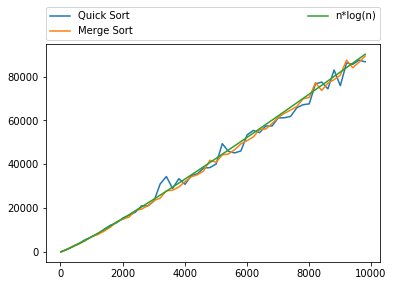

In [38]:
def MergeSort(arr):
    if len(arr)<=1: # Single element and empty lists are already sorted
        return arr
    else:
        left = MergeSort(arr[:len(arr)//2]) # MergeSort left half
        right = MergeSort(arr[len(arr)//2:]) # MergeSort right half
        s_arr = []
        while len(left)>0 and len(right)>0: # Merge both halves
            if left[0] > right[0]:
                s_arr.append(right.pop(0))
            else:
                s_arr.append(left.pop(0))
        return s_arr + left + right # Return merged list


def QuickSort(arr):
    if len(arr)<=1: # Single element and empty lists are already sorted
        return arr
    else:
        pivot = arr[0] # Pivot is chosen as the first element
        left = QuickSort(list(filter((lambda x : x<pivot),arr))) # Elements smaller than the pivot
        mid = list(filter((lambda x : x==pivot),arr)) # Elements equal to the pivot
        right = QuickSort(list(filter((lambda x : x>pivot),arr))) # Elements greater than the pivot
        return left+mid+right # Return combined list


#Testing the runtime complexities on randomized lists of increasing lengths
#Expected complexity is O(n*log(n))

import random as r
import time as t
import math
from matplotlib import pyplot as plt

nlogn, mergesort_time, n, quicksort_time = [],[],[],[]

for i in range(10, 10000, 200):
    tester = list(r.random() for x in range(i))
    
    t1 = t.clock()
    MergeSort(tester)
    t2 = t.clock()
    
    t3 = t.clock()
    QuickSort(tester)
    t4 = t.clock()
    
    million = 1000000
    microsecs = int(t2*million - t1*million)
    mergesort_time.append(microsecs) # Adding MergeSort Performance Time   
    microsecs = int(t4*million - t3*million)
    quicksort_time.append(microsecs) # Adding QuickSort Performance Time
    
    n.append(i) # Adding number of elements
    nlogn.append(i*math.log(i)) # Adding expected complexity

# Plotting    
a=plt.plot(n, quicksort_time, label="Quick Sort")
b=plt.plot(n, mergesort_time, label="Merge Sort")
c=plt.plot(n, nlogn, label="n*log(n)")
plt.legend(bbox_to_anchor=(0., 1.02,  1., .102), loc=3, 
           ncol=2,  mode="expand", borderaxespad=0.)
plt.show()